# The dataset contains 2 files: deliveries.csv and matches.csv. 

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df1=pd.read_csv('deliveries.csv')
df2=pd.read_csv('matches.csv')

# 1. deliveries.csv is the ball-by-ball data of all the IPL matches including data of the batting team, batsman, bowler, non-striker, runs scored, etc.

In [3]:
df1.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [5]:
df1.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000
mean,318.281317,1.482188,10.142649,3.616483,0.000538,0.037498,0.004885,0.022232,0.004340,0.000066,1.222445,0.069022,1.291466
std,182.955531,0.501768,5.674338,1.807698,0.023196,0.257398,0.114234,0.200104,0.072652,0.018229,1.594509,0.349667,1.583240
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,161.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,319.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,476.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,636.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000


# 2. matches.csv contains details related to the match such as location, contesting teams, umpires, results, etc.

In [16]:
df2.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [6]:
df2.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


# 1	How many matches we've got in the dataset?

In [13]:
df1.match_id.max()

636

# 2	How many seasons we've got in the dataset?

In [25]:
df2.season.unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

# 3	Which Team had won by maximum runs?

In [28]:
df2[df2.win_by_runs==df2.win_by_runs.max()]['winner']

43    Mumbai Indians
Name: winner, dtype: object

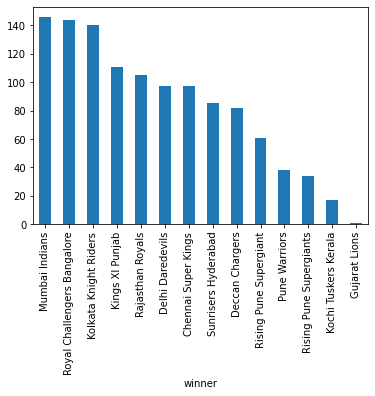

In [23]:
df2.groupby('winner')['win_by_runs'].max().sort_values(ascending=False).plot(kind='bar')
plt.show()

# 4	Which Team had won by maximum wicket?

In [63]:
df2[df2.win_by_wickets==df2.win_by_wickets.max()]['winner']

2            Kolkata Knight Riders
34                 Kings XI Punjab
71                 Deccan Chargers
119               Delhi Daredevils
183    Royal Challengers Bangalore
298               Rajasthan Royals
376                 Mumbai Indians
390            Chennai Super Kings
542    Royal Challengers Bangalore
590            Sunrisers Hyderabad
Name: winner, dtype: object

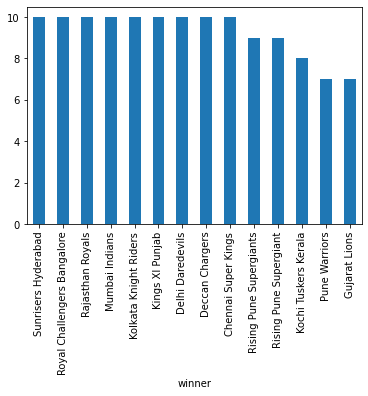

In [24]:
df2.groupby('winner')['win_by_wickets'].max().sort_values(ascending=False).plot(kind='bar')
plt.show()

# 5	Which Team had won by closest Margin (minimum runs)?

In [62]:
df2[(df2.win_by_runs==1)|(df2.win_by_wickets==1)]['winner']

58                  Mumbai Indians
105                Kings XI Punjab
163                Kings XI Punjab
344               Delhi Daredevils
350                 Mumbai Indians
518            Chennai Super Kings
559          Kolkata Knight Riders
598                  Gujarat Lions
614    Royal Challengers Bangalore
Name: winner, dtype: object

# 6	Which Team had won by minimum wicket?

In [61]:
df2[df2.win_by_wickets==1]['winner']

559    Kolkata Knight Riders
Name: winner, dtype: object

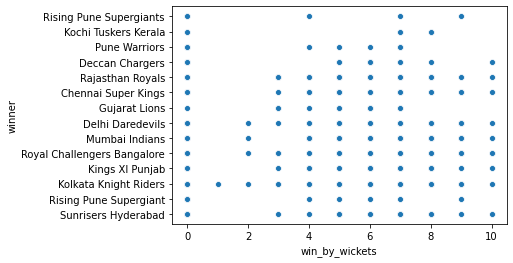

In [30]:
sns.scatterplot(df2['win_by_wickets'],df2['winner'])
plt.show()

# 7	Which Season had most number of matches?

In [46]:
df2.season.value_counts().head(1)

2013    76
Name: season, dtype: int64

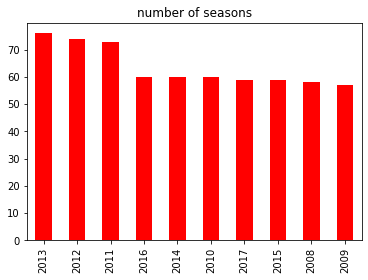

In [69]:
df2.season.value_counts().plot(kind='bar',title='number of seasons',color='red')
plt.show()

# 8	Which IPL Team is more successful?

In [58]:
df2.winner.value_counts().head(1)

Mumbai Indians    92
Name: winner, dtype: int64

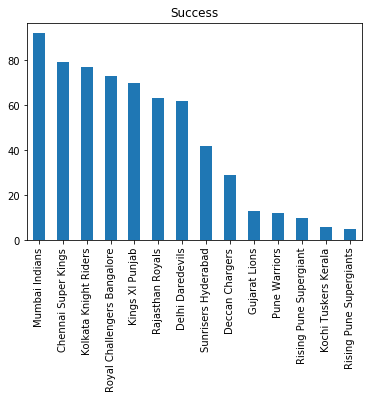

In [67]:
df2.winner.value_counts().plot(kind='bar',title='Success')
plt.show()

# 9	Has Toss-winning helped in winning matches?

In [64]:
((df2.toss_winner==df2.winner).sum())/(df1.match_id.max())    # 51% of the time toss winners win the match

0.5110062893081762

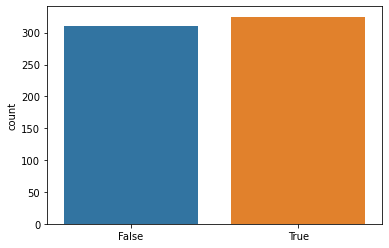

In [38]:
sns.countplot(df2.toss_winner==df2.winner)
plt.show()